In [1]:
#------------Importing Libraries----------#
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
import imblearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import math

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male

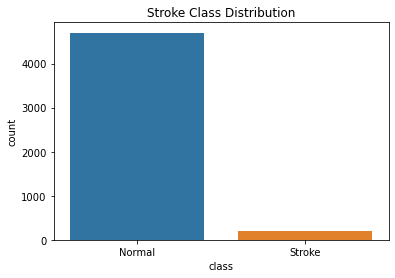

Percentage of Negative and Positive
 0    95.742514
1     4.257486
Name: class, dtype: float64


<AxesSubplot:>

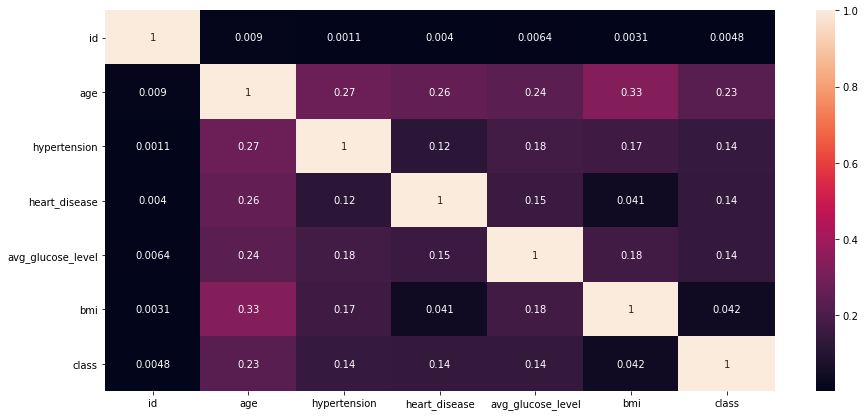

In [2]:
# Importing Dataset
data = pd.read_csv('stroke_prediction_data.csv')
print(data.info())

# Removing NAN Values
data.dropna(subset = ["bmi"], inplace=True)
data.isnull().sum()

# Renaming target variable 'Stroke' to 'Class'
data = data.rename(columns={'stroke':'class'})
print(data.head())


# Checking Class Distribution for Imbalance
stroke = data[data['class']==1]
normal = data[data['class']==0]

data["class"].value_counts()
LABELS = ["Normal", "Stroke"]
 
ax = sns.countplot(x="class", data=data)
plt.xticks(range(2), LABELS)
plt.title("Stroke Class Distribution")
plt.show()

# Calculating percentage of positive (1) and negative (0) classes
print("Percentage of Negative and Positive\n",data["class"].value_counts()/len(data)*100)

# Checking Correlation between features
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

In [3]:
categorical_variables=['gender','ever_married','work_type','Residence_type','smoking_status']
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
for feature in categorical_variables:
    data[feature]= label_encoder.fit_transform(data[feature])
    data[feature].unique()
    
print("Stroke Positive Class '1':",stroke.shape,"Healthy Class '0':",normal.shape)
print(data.head())

Stroke Positive Class '1': (209, 12) Healthy Class '0': (4700, 12)
      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   
5  56669       1  81.0             0              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  class  
0               1             228.69  36.6               1      1  
2               0             105.92  32.5               2      1  
3               1             171.23  34.4               3      1  
4               0             174.12  24.0               2      1  
5               1             186.21  29.0               1      1  


            id  gender       age  hypertension  heart_disease  ever_married  \
0     0.123094     0.5  0.816895           0.0            1.0           1.0   
2     0.425936     0.5  0.975586           0.0            1.0           1.0   
3     0.824904     0.0  0.597168           0.0            0.0           1.0   
4     0.021794     0.0  0.963379           1.0            0.0           1.0   
5     0.776691     0.5  0.987793           0.0            0.0           1.0   
...        ...     ...       ...           ...            ...           ...   
5104  0.193555     0.0  0.157715           0.0            0.0           0.0   
5106  0.614798     0.0  0.987793           0.0            0.0           1.0   
5107  0.269629     0.0  0.426270           0.0            0.0           1.0   
5108  0.514212     0.5  0.621582           0.0            0.0           1.0   
5109  0.612135     0.0  0.536133           0.0            0.0           1.0   

      work_type  Residence_type  avg_glucose_level 

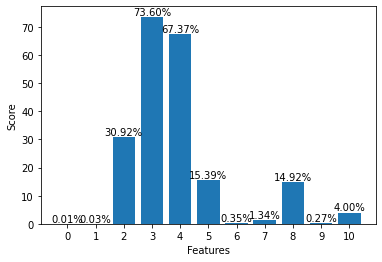

In [4]:
# Normalising data for feature selection
X_fs = data.drop("class", axis = 1)
y_fs = data["class"]
X_fs = (X_fs - np.min(X_fs)) / (np.max(X_fs) - np.min(X_fs)).values
print(X_fs)

# Splitting 80% Dataset into Training and 20% into Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fs,y_fs,test_size = 0.2,random_state=0)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
ax = plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Features')
plt.ylabel('Score')
for i in range(len(fs.scores_)):
    plt.annotate("{:.2f}%".format((fs.scores_[i])), xy=(i,fs.scores_[i]), ha='center', va='bottom')

plt.show()

In [5]:
# Delete 'id' as it has scored least and is irrelevant
del data["id"]
del data["gender"]
print(data.head)

#Normalising the numerical values in the Dataset
X = data.drop("class", axis = 1)
y = data["class"]

X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
print(X)
print(y)

<bound method NDFrame.head of        age  hypertension  heart_disease  ever_married  work_type  \
0     67.0             0              1             1          2   
2     80.0             0              1             1          2   
3     49.0             0              0             1          2   
4     79.0             1              0             1          3   
5     81.0             0              0             1          2   
...    ...           ...            ...           ...        ...   
5104  13.0             0              0             0          4   
5106  81.0             0              0             1          3   
5107  35.0             0              0             1          3   
5108  51.0             0              0             1          2   
5109  44.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  class  
0                  1             228.69  36.6               1      1  
2          

In [6]:
from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_undersample,y_undersample =nm.fit_resample(X,y)
print(X_undersample.shape,y_undersample.shape)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_undersample)))

(418, 9) (418,)
Original dataset shape Counter({0: 4700, 1: 209})
Resampled dataset shape Counter({0: 209, 1: 209})


In [7]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_oversample, y_oversample = os.fit_resample(X, y)
print(X_oversample.shape,y_oversample.shape)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_oversample)))

(9400, 9) (9400,)
Original dataset shape Counter({0: 4700, 1: 209})
Resampled dataset shape Counter({1: 4700, 0: 4700})


In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
print(x_smote.shape, y_smote.shape)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_oversample)))

(9400, 9) (9400,)
Original dataset shape Counter({0: 4700, 1: 209})
Resampled dataset shape Counter({1: 4700, 0: 4700})


In [25]:
# Splitting Dataset into Training and Testing:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size = 0.5,random_state = 42,shuffle ='True')
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersample,y_undersample,test_size = 0.5,random_state = 42,shuffle ='True')
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversample,y_oversample,test_size = 0.5,random_state = 42,shuffle ='True')

accuracies = {}
accuracies1 = {}
accuracies2 = {}

----------Logistic Regression SMOTE----------
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2392
           1       0.75      0.81      0.78      2308

    accuracy                           0.77      4700
   macro avg       0.77      0.77      0.77      4700
weighted avg       0.77      0.77      0.77      4700

Precision Score:  0.75
Recall Score:  0.81
F1 Score:  0.78
Accuracy Score:  0.77
ROC AUC:  0.85
Test Accuracy 77.30%
Train Accuracy:  0.7774468085106383
----------Logistic Regression Under-Sample----------
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       113
           1       0.75      0.71      0.73        96

    accuracy                           0.76       209
   macro avg       0.75      0.75      0.75       209
weighted avg       0.76      0.76      0.76       209

Precision Score:  0.75
Recall Score:  0.71
F1 Score:  0.73
Accuracy Score:  0.76
ROC AUC:  0.8

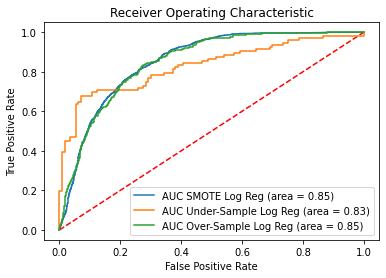

In [41]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Logistic Regression with SMOTE sample
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
cr_log = classification_report(y_test, y_pred_log)
probs= log.predict_proba(X_test)
preds =probs[:,1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, preds)
roc_auc_log = auc(fpr_log, tpr_log)
print("----------Logistic Regression SMOTE----------")
print(cr_log)
print('Precision Score: ', round(precision_score(y_test, y_pred_log), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_log), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_log), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_log), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, preds), 2))

acc_log = log.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc_log
print("Test Accuracy {:.2f}%".format(acc_log))
print("Train Accuracy: ", accuracy_score(y_train, log.predict(X_train)))


# Logistic Regression with Under-sample
log1 = LogisticRegression()
log1.fit(X_train_us, y_train_us)
y_pred_log1 = log1.predict(X_test_us)
cr_log1 = classification_report(y_test_us, y_pred_log1)
probs1= log1.predict_proba(X_test_us)
preds_log1 =probs1[:,1]
fpr_log1, tpr_log1, thresholds_log1 = roc_curve(y_test_us, preds_log1)
roc_auc_log1 = auc(fpr_log1, tpr_log1)
print("----------Logistic Regression Under-Sample----------")
print(cr_log1)
print('Precision Score: ', round(precision_score(y_test_us, y_pred_log1), 2))
print('Recall Score: ', round(recall_score(y_test_us, y_pred_log1), 2))
print('F1 Score: ', round(f1_score(y_test_us, y_pred_log1), 2))
print('Accuracy Score: ', round(accuracy_score(y_test_us, y_pred_log1), 2))
print('ROC AUC: ', round(roc_auc_score(y_test_us, preds_log1), 2))

acc_log1 = log.score(X_test_us,y_test_us)*100
accuracies1['Logistic Regression'] = acc_log1
print("Test Accuracy {:.2f}%".format(acc_log1))
print("Train Accuracy: ", accuracy_score(y_train_us, log1.predict(X_train_us)))


# Logistic Regression with Over-sample
log2 = LogisticRegression()
log2.fit(X_train_os, y_train_os)
y_pred_log2 = log2.predict(X_test_os)
cr_log2 = classification_report(y_test_os, y_pred_log2)
probs2= log2.predict_proba(X_test_os)
preds_log2 =probs2[:,1]
fpr_log2, tpr_log2, thresholds_log2 = roc_curve(y_test_os, preds_log2)
roc_auc_log2 = auc(fpr_log2, tpr_log2)
print("----------Logistic Regression Over-Sample----------")
print(cr_log2)
print('Precision Score: ', round(precision_score(y_test_os, y_pred_log2), 2))
print('Recall Score: ', round(recall_score(y_test_os, y_pred_log2), 2))
print('F1 Score: ', round(f1_score(y_test_os, y_pred_log2), 2))
print('Accuracy Score: ', round(accuracy_score(y_test_os, y_pred_log2), 2))
print('ROC AUC: ', round(roc_auc_score(y_test_os, preds_log2), 2))
acc_log2 = log.score(X_test_os,y_test_os)*100
accuracies2['Logistic Regression'] = acc_log2
print("Test Accuracy {:.2f}%".format(acc_log2))
print("Train Accuracy: ", accuracy_score(y_train_os, log2.predict(X_train_os)))

plt.figure()
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_log, tpr_log, label='AUC SMOTE Log Reg (area = %0.2f)' % roc_auc_log)
plt.plot(fpr_log1, tpr_log1, label='AUC Under-Sample Log Reg (area = %0.2f)' % roc_auc_log1)
plt.plot(fpr_log2, tpr_log2, label='AUC Over-Sample Log Reg (area = %0.2f)' % roc_auc_log2)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


----------KNN SMOTE----------
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      2392
           1       0.83      0.97      0.89      2308

    accuracy                           0.89      4700
   macro avg       0.90      0.89      0.89      4700
weighted avg       0.90      0.89      0.89      4700

Precision Score:  0.83
Recall Score:  0.97
F1 Score:  0.89
Accuracy Score:  0.89
ROC AUC:  0.95
Maximum KNN Score is 88.64%
1 NN Test Score: 88.64%
Train Accuracy:  0.9236170212765957
----------KNN Under-Sample----------
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       113
           1       0.82      0.69      0.75        96

    accuracy                           0.79       209
   macro avg       0.80      0.78      0.78       209
weighted avg       0.79      0.79      0.79       209

Precision Score:  0.82
Recall Score:  0.69
F1 Score:  0.75
Accuracy Score:  0.79
ROC AUC:  0.85

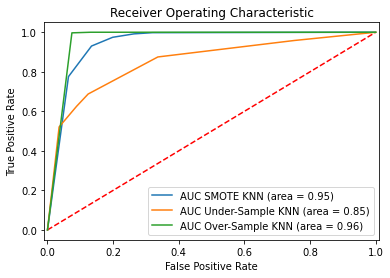

In [42]:
# KNN Models
from sklearn.neighbors import KNeighborsClassifier

# KNN Model with SMOTE sample
knn = KNeighborsClassifier()  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cr_knn = classification_report(y_test, y_pred_knn)
probs_knn = knn.predict_proba(X_test)
preds_knn =probs_knn[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, preds_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print("----------KNN SMOTE----------")
print(cr_knn)
print('Precision Score: ', round(precision_score(y_test, y_pred_knn), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_knn), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, preds_knn), 2))
acc_knn = knn.score(X_test,y_test)*100
accuracies['KNN'] = acc_knn
print("Maximum KNN Score is {:.2f}%".format(acc_knn))
print("{} NN Test Score: {:.2f}%".format(1, knn.score(X_test, y_test)*100))
print("Train Accuracy: ", accuracy_score(y_train, knn.predict(X_train)))

# KNN Model with Under-sample
knn1 = KNeighborsClassifier()  # n_neighbors means k
knn1.fit(X_train_us, y_train_us)
y_pred_knn1 = knn1.predict(X_test_us)
cr_knn1 = classification_report(y_test_us, y_pred_knn1)
probs_knn1= knn1.predict_proba(X_test_us)
preds_knn1 =probs_knn1[:,1]
fpr_knn1, tpr_knn1, thresholds_knn1 = roc_curve(y_test_us, preds_knn1)
roc_auc_knn1 = auc(fpr_knn1, tpr_knn1)
print("----------KNN Under-Sample----------")
print(cr_knn1)
print('Precision Score: ', round(precision_score(y_test_us, y_pred_knn1), 2))
print('Recall Score: ', round(recall_score(y_test_us, y_pred_knn1), 2))
print('F1 Score: ', round(f1_score(y_test_us, y_pred_knn1), 2))
print('Accuracy Score: ', round(accuracy_score(y_test_us, y_pred_knn1), 2))
print('ROC AUC: ', round(roc_auc_score(y_test_us, preds_knn1), 2))
acc_knn1 = knn1.score(X_test_us,y_test_us)*100
accuracies1['KNN'] = acc_knn1
print("Maximum KNN Score is {:.2f}%".format(acc_knn1))
print("{} NN Test Score: {:.2f}%".format(1, knn1.score(X_test_us, y_test_us)*100))
print("Train Accuracy: ", accuracy_score(y_train_us, knn1.predict(X_train_us)))

# KNN Model with Over-sample
knn2 = KNeighborsClassifier()  # n_neighbors means k
knn2.fit(X_train_os, y_train_os)
y_pred_knn2 = knn2.predict(X_test_os)
cr_knn2 = classification_report(y_test_os, y_pred_knn2)
probs_knn2= knn2.predict_proba(X_test_os)
preds_knn2 =probs_knn2[:,1]
fpr_knn2, tpr_knn2, thresholds_knn2 = roc_curve(y_test_os, preds_knn2)
roc_auc_knn2 = auc(fpr_knn2, tpr_knn2)
print("----------KNN Under-Sample----------")
print(cr_knn2)
print('Precision Score: ', round(precision_score(y_test_os, y_pred_knn2), 2))
print('Recall Score: ', round(recall_score(y_test_os, y_pred_knn2), 2))
print('F1 Score: ', round(f1_score(y_test_os, y_pred_knn2), 2))
print('Accuracy Score: ', round(accuracy_score(y_test_os, y_pred_knn2), 2))
print('ROC AUC: ', round(roc_auc_score(y_test_os, preds_knn2), 2))
acc_knn2 = knn2.score(X_test_os,y_test_os)*100
accuracies2['KNN'] = acc_knn2
print("Maximum KNN Score is {:.2f}%".format(acc_knn2))
print("{} NN Test Score: {:.2f}%".format(1, knn1.score(X_test_os, y_test_os)*100))
print("Train Accuracy: ", accuracy_score(y_train_os, knn2.predict(X_train_os)))

plt.figure()
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_knn, tpr_knn, label='AUC SMOTE KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_knn1, tpr_knn1, label='AUC Under-Sample KNN (area = %0.2f)' % roc_auc_knn1)
plt.plot(fpr_knn2, tpr_knn2, label='AUC Over-Sample KNN (area = %0.2f)' % roc_auc_knn2)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.xlim([-0.01,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


----------SVM SMOTE----------
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      2392
           1       0.76      0.86      0.81      2308

    accuracy                           0.80      4700
   macro avg       0.80      0.80      0.80      4700
weighted avg       0.81      0.80      0.80      4700

Precision Score:  0.76
Recall Score:  0.86
F1 Score:  0.81
Accuracy Score:  0.8
ROC AUC:  0.88
Test Accuracy of SVM Algorithm: 79.94%
Train Accuracy:  0.8180851063829787
----------SVM Under-sample----------
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       113
           1       0.88      0.68      0.76        96

    accuracy                           0.81       209
   macro avg       0.82      0.80      0.80       209
weighted avg       0.82      0.81      0.80       209

Precision Score:  0.88
Recall Score:  0.68
F1 Score:  0.76
Accuracy Score:  0.81
ROC AUC:  0.88
Test Accuracy

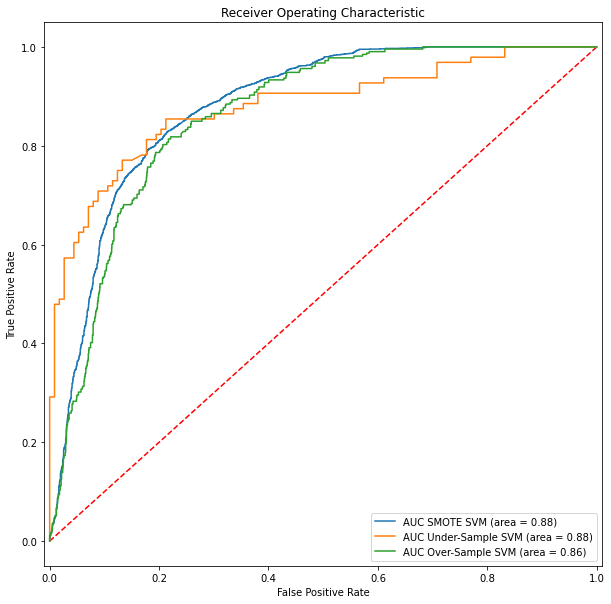

In [40]:
from sklearn.svm import SVC

# Support Vector Machine Model with SMOTE sample

svm = SVC(probability = True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cr_svm = classification_report(y_test, y_pred_svm)
probs_svm = svm.predict_proba(X_test)
preds_svm =probs_svm[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, preds_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("----------SVM SMOTE----------")
print(cr_svm)
print('Precision Score: ', round(precision_score(y_test, y_pred_svm), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_svm), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_svm), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_svm), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, preds_svm), 2))
acc_svm = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc_svm
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc_svm))
print("Train Accuracy: ", accuracy_score(y_train, svm.predict(X_train)))

# Support Vector Machine Model with Under-sample
svm1 = SVC(probability = True)
svm1.fit(X_train_us, y_train_us)
y_pred_svm1 = svm1.predict(X_test_us)
cr_svm1 = classification_report(y_test_us, y_pred_svm1)
probs_svm1 = svm1.predict_proba(X_test_us)
preds_svm1 =probs_svm1[:,1]
fpr_svm1, tpr_svm1, thresholds_svm1 = roc_curve(y_test_us, preds_svm1)
roc_auc_svm1 = auc(fpr_svm1, tpr_svm1)
print("----------SVM Under-sample----------")
print(cr_svm1)
print('Precision Score: ', round(precision_score(y_test_us, y_pred_svm1), 2))
print('Recall Score: ', round(recall_score(y_test_us, y_pred_svm1), 2))
print('F1 Score: ', round(f1_score(y_test_us, y_pred_svm1), 2))
print('Accuracy Score: ', round(accuracy_score(y_test_us, y_pred_svm1), 2))
print('ROC AUC: ', round(roc_auc_score(y_test_us, preds_svm1), 2))
acc_svm1 = svm1.score(X_test_us,y_test_us)*100
accuracies1['SVM'] = acc_svm1
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc_svm1))
print("Train Accuracy: ", accuracy_score(y_train_us, svm1.predict(X_train_us)))

# Support Vector Machine Model with Over-sample
svm2 = SVC(probability = True)
svm2.fit(X_train_os, y_train_os)
y_pred_svm2 = svm2.predict(X_test_os)
cr_svm2 = classification_report(y_test_os, y_pred_svm2)
probs_svm2 = svm.predict_proba(X_test_os)
preds_svm2 =probs_svm2[:,1]
fpr_svm2, tpr_svm2, thresholds_svm2 = roc_curve(y_test_os, preds_svm2)
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)
print("----------SVM Ovder-sample----------")
print(cr_svm2)
print('Precision Score: ', round(precision_score(y_test_os, y_pred_svm2), 2))
print('Recall Score: ', round(recall_score(y_test_os, y_pred_svm2), 2))
print('F1 Score: ', round(f1_score(y_test_os, y_pred_svm2), 2))
print('Accuracy Score: ', round(accuracy_score(y_test_os, y_pred_svm2), 2))
print('ROC AUC: ', round(roc_auc_score(y_test_os, preds_svm2), 2))
acc_svm2 = svm2.score(X_test_os,y_test_os)*100
accuracies2['SVM'] = acc_svm2
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc_svm2))
print("Train Accuracy: ", accuracy_score(y_train_os, svm2.predict(X_train_os)))

# Plotting ROC for all samples
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_svm, tpr_svm, label='AUC SMOTE SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm1, tpr_svm1, label='AUC Under-Sample SVM (area = %0.2f)' % roc_auc_svm1)
plt.plot(fpr_svm2, tpr_svm2, label='AUC Over-Sample SVM (area = %0.2f)' % roc_auc_svm2)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.xlim([-0.01,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

----------RFC SMOTE----------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2392
           1       0.92      0.96      0.94      2308

    accuracy                           0.94      4700
   macro avg       0.94      0.94      0.94      4700
weighted avg       0.94      0.94      0.94      4700

Precision Score:  0.92
Recall Score:  0.96
F1 Score:  0.94
Accuracy Score:  0.94
ROC AUC:  0.99
RFC Test Accuracy 93.74%
RFC Train Accuracy:  1.0
----------RFC Undersample----------
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       113
           1       0.78      0.86      0.82        96

    accuracy                           0.82       209
   macro avg       0.82      0.83      0.82       209
weighted avg       0.83      0.82      0.82       209

Precision Score:  0.78
Recall Score:  0.86
F1 Score:  0.82
Accuracy Score:  0.82
ROC AUC:  0.87
RFC Test Accuracy 76.08%
RFC Train Acc

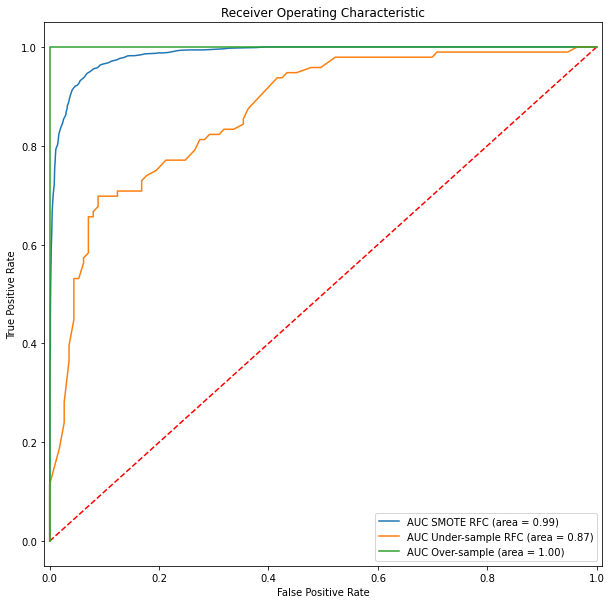

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier with SMOTE sample
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
cr_rfc = classification_report(y_test, y_pred_rfc)
probs_rfc = rfc.predict_proba(X_test)
preds_rfc = probs_rfc[:,1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, preds_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
print("----------RFC SMOTE----------")
print(cr_rfc)
print('Precision Score: ', round(precision_score(y_test, y_pred_rfc), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_rfc), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_rfc), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_rfc), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, preds_rfc), 2))
acc_rfc = rfc.score(X_test, y_test)*100
accuracies['Random Forest'] = acc_rfc
print("RFC Test Accuracy {:.2f}%".format(acc_rfc))
print("RFC Train Accuracy: ", accuracy_score(y_train, rfc.predict(X_train)))

# Random Forest Classifier with Under-sample
rfc1 = RandomForestClassifier()
rfc1.fit(X_train_us, y_train_us)
y_pred_rfc1 = rfc.predict(X_test_us)
cr_rfc1 = classification_report(y_test_us, y_pred_rfc1)
probs_rfc1 = rfc1.predict_proba(X_test_us)
preds_rfc1 = probs_rfc1[:,1]
fpr_rfc1, tpr_rfc1, thresholds_rfc1 = roc_curve(y_test_us, preds_rfc1)
roc_auc_rfc1 = auc(fpr_rfc1, tpr_rfc1)
print("----------RFC Undersample----------")
print(cr_rfc1)
print('Precision Score: ', round(precision_score(y_test_us, y_pred_rfc1), 2))
print('Recall Score: ', round(recall_score(y_test_us, y_pred_rfc1), 2))
print('F1 Score: ', round(f1_score(y_test_us, y_pred_rfc1), 2))
print('Accuracy Score: ', round(accuracy_score(y_test_us, y_pred_rfc1), 2))
print('ROC AUC: ', round(roc_auc_score(y_test_us, preds_rfc1), 2))
acc_rfc1 = rfc1.score(X_test_us, y_test_us)*100
accuracies1['Random Forest'] = acc_rfc1
print("RFC Test Accuracy {:.2f}%".format(acc_rfc1))
print("RFC Train Accuracy: ", accuracy_score(y_train_us, rfc1.predict(X_train_us)))

# Random Forest Classifier with Over-sample
rfc2 = RandomForestClassifier()
rfc2.fit(X_train_os, y_train_os)
y_pred_rfc2 = rfc.predict(X_test_os)
cr_rfc2 = classification_report(y_test_os, y_pred_rfc2)
probs_rfc2 = rfc2.predict_proba(X_test_os)
preds_rfc2 = probs_rfc2[:,1]
fpr_rfc2, tpr_rfc2, thresholds_rfc2 = roc_curve(y_test_os, preds_rfc2)
roc_auc_rfc2 = auc(fpr_rfc2, tpr_rfc2)
print("----------RFC Oversample----------")
print(cr_rfc2)
print('Precision Score: ', round(precision_score(y_test_os, y_pred_rfc2), 2))
print('Recall Score: ', round(recall_score(y_test_os, y_pred_rfc2), 2))
print('F1 Score: ', round(f1_score(y_test_os, y_pred_rfc2), 2))
print('Accuracy Score: ', round(accuracy_score(y_test_os, y_pred_rfc2), 2))
print('ROC AUC: ', round(roc_auc_score(y_test_os, preds_rfc2), 2))
acc_rfc2 = rfc2.score(X_test_os, y_test_os)*100
accuracies2['Random Forest'] = acc_rfc2
print("RFC Test Accuracy {:.2f}%".format(acc_rfc2))
print("RFC Train Accuracy: ", accuracy_score(y_train_os, rfc2.predict(X_train_os)))


# Plotting ROC for all samples
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_rfc, tpr_rfc, label='AUC SMOTE RFC (area = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_rfc1, tpr_rfc1, label='AUC Under-sample RFC (area = %0.2f)' % roc_auc_rfc1)
plt.plot(fpr_rfc2, tpr_rfc2, label='AUC Over-sample (area = %0.2f)' % roc_auc_rfc2)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.xlim([-0.01,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


----------NB SMOTE----------
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      2392
           1       0.75      0.78      0.77      2308

    accuracy                           0.76      4700
   macro avg       0.76      0.76      0.76      4700
weighted avg       0.76      0.76      0.76      4700

Precision Score:  0.75
Recall Score:  0.78
F1 Score:  0.77
Accuracy Score:  0.76
ROC AUC:  0.84
Accuracy of Naive Bayes: 76.36%
NB Train Accuracy:  0.7646808510638298
----------NB Undersample----------
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       113
           1       0.89      0.66      0.75        96

    accuracy                           0.80       209
   macro avg       0.82      0.79      0.80       209
weighted avg       0.82      0.80      0.80       209

Precision Score:  0.89
Recall Score:  0.66
F1 Score:  0.75
Accuracy Score:  0.8
ROC AUC:  0.9
Accuracy of Naive Bay

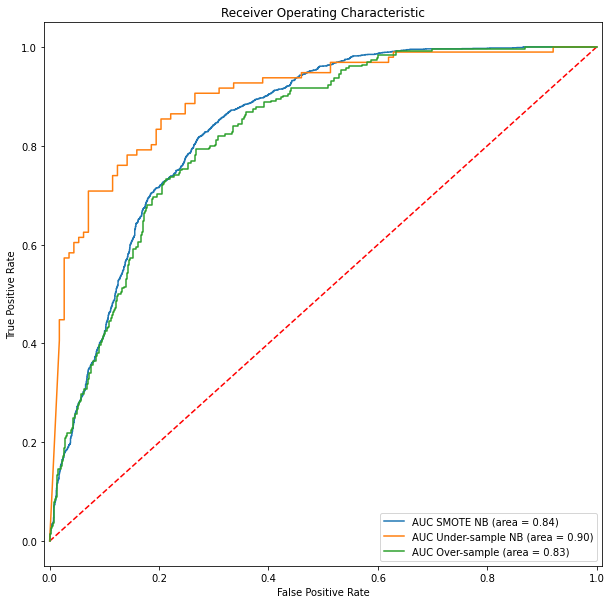

In [30]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes with SMOTE sample
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
cr_nb = classification_report(y_test, y_pred_nb)
probs_nb = nb.predict_proba(X_test)
preds_nb = probs_nb[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, preds_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
print("----------NB SMOTE----------")
print(cr_nb)
print('Precision Score: ', round(precision_score(y_test, y_pred_nb), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_nb), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_nb), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_nb), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, preds_nb), 2))
acc_nb = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc_nb
print("Accuracy of Naive Bayes: {:.2f}%".format(acc_nb))
print("NB Train Accuracy: ", accuracy_score(y_train, nb.predict(X_train)))

# Naive Bayes with Under-sample
nb1 = GaussianNB()
nb1.fit(X_train_us, y_train_us)
y_pred_nb1 = nb1.predict(X_test_us)
cr_nb1 = classification_report(y_test_us, y_pred_nb1)
probs_nb1 = nb1.predict_proba(X_test_us)
preds_nb1 = probs_nb1[:,1]
fpr_nb1, tpr_nb1, thresholds_nb1 = roc_curve(y_test_us, preds_nb1)
roc_auc_nb1 = auc(fpr_nb1, tpr_nb1)
print("----------NB Undersample----------")
print(cr_nb1)
print('Precision Score: ', round(precision_score(y_test_us, y_pred_nb1), 2))
print('Recall Score: ', round(recall_score(y_test_us, y_pred_nb1), 2))
print('F1 Score: ', round(f1_score(y_test_us, y_pred_nb1), 2))
print('Accuracy Score: ', round(accuracy_score(y_test_us, y_pred_nb1), 2))
print('ROC AUC: ', round(roc_auc_score(y_test_us, preds_nb1), 2))
acc_nb1 = nb1.score(X_test_us,y_test_us)*100
accuracies1['Naive Bayes'] = acc_nb1
print("Accuracy of Naive Bayes: {:.2f}%".format(acc_nb1))
print("NB Train Accuracy: ", accuracy_score(y_train_us, nb1.predict(X_train_us)))

# Naive Bayes with Over-sample
nb2 = GaussianNB()
nb2.fit(X_train_os, y_train_os)
y_pred_nb2 = nb2.predict(X_test_os)
cr_nb2 = classification_report(y_test_os, y_pred_nb2)
probs_nb2 = nb2.predict_proba(X_test_os)
preds_nb2 = probs_nb2[:,1]
fpr_nb2, tpr_nb2, thresholds_nb2 = roc_curve(y_test_os, preds_nb2)
roc_auc_nb2 = auc(fpr_nb2, tpr_nb2)
print("----------NB Oversample----------")
print(cr_nb2)
print('Precision Score: ', round(precision_score(y_test_os, y_pred_nb2), 2))
print('Recall Score: ', round(recall_score(y_test_os, y_pred_nb2), 2))
print('F1 Score: ', round(f1_score(y_test_os, y_pred_nb2), 2))
print('Accuracy Score: ', round(accuracy_score(y_test_os, y_pred_nb2), 2))
print('ROC AUC: ', round(roc_auc_score(y_test_os, preds_nb2), 2))
acc_nb2 = nb2.score(X_test_os,y_test_os)*100
accuracies2['Naive Bayes'] = acc_nb2
print("Accuracy of Naive Bayes: {:.2f}%".format(acc_nb2))
print("NB Train Accuracy: ", accuracy_score(y_train_os, nb2.predict(X_train_os)))



# Plotting ROC for all samples
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_nb, tpr_nb, label='AUC SMOTE NB (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_nb1, tpr_nb1, label='AUC Under-sample NB (area = %0.2f)' % roc_auc_nb1)
plt.plot(fpr_nb2, tpr_nb2, label='AUC Over-sample (area = %0.2f)' % roc_auc_nb2)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.xlim([-0.01,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**-----COMPARING ALL ALGORITHMS FOR SMOTE, UNDERSAMPLE AND OVERSAMPLE-----**

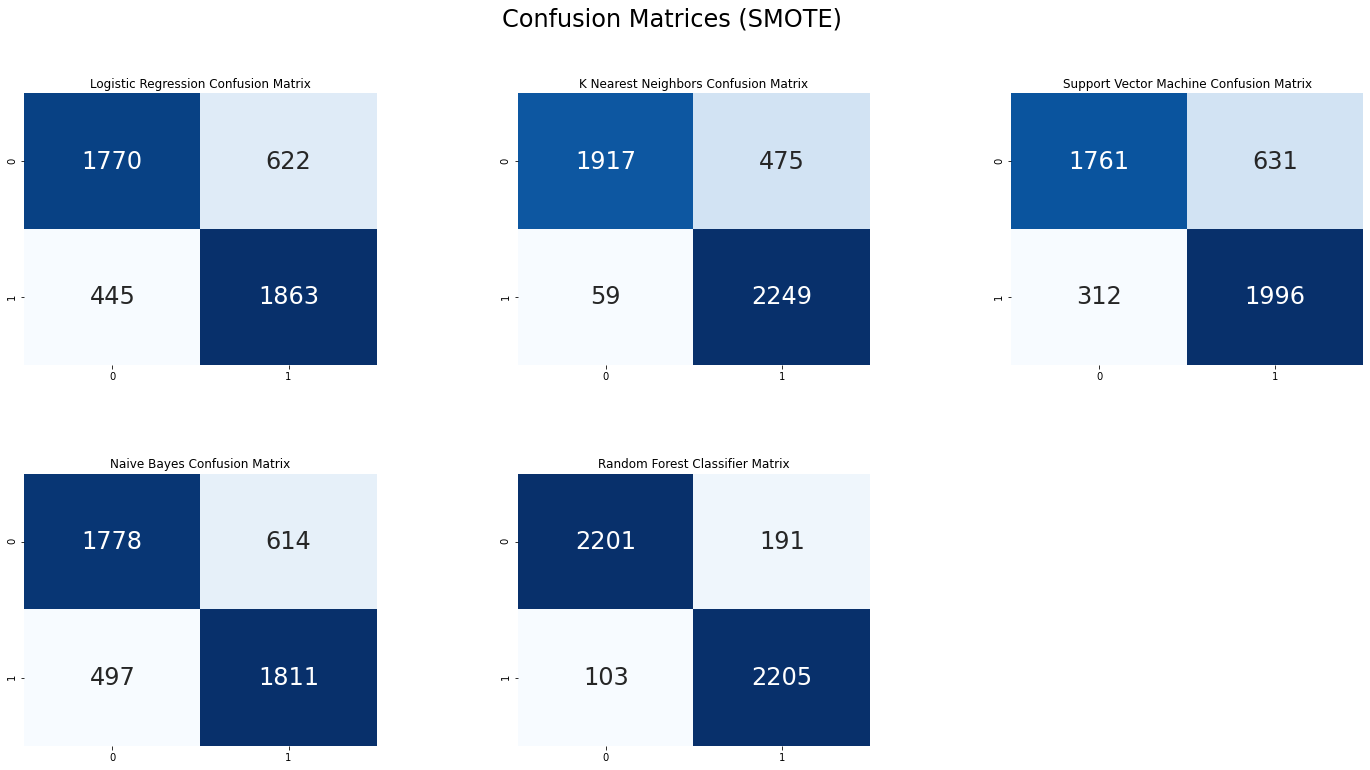

In [31]:
# Confusion Matrix for SMOTE values
cm_lr = confusion_matrix(y_test,y_pred_log)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_rfc = confusion_matrix(y_test,y_pred_rfc)

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices (SMOTE)",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Classifier Matrix")
sns.heatmap(cm_rfc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

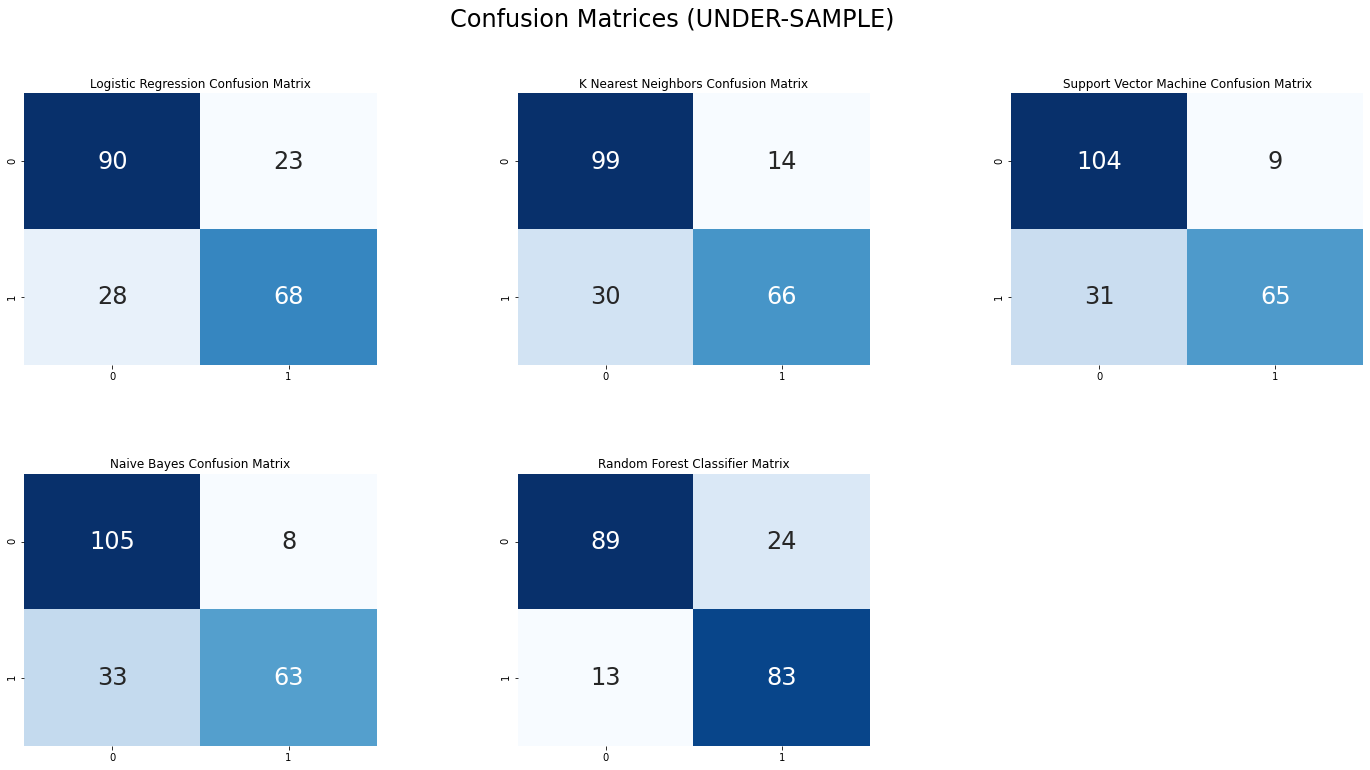

In [32]:
# Confusion Matrix for Undersample values
cm_lr1 = confusion_matrix(y_test_us,y_pred_log1)
cm_knn1 = confusion_matrix(y_test_us,y_pred_knn1)
cm_svm1 = confusion_matrix(y_test_us,y_pred_svm1)
cm_nb1 = confusion_matrix(y_test_us,y_pred_nb1)
cm_rfc1 = confusion_matrix(y_test_us,y_pred_rfc1)

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices (UNDER-SAMPLE)",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Classifier Matrix")
sns.heatmap(cm_rfc1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

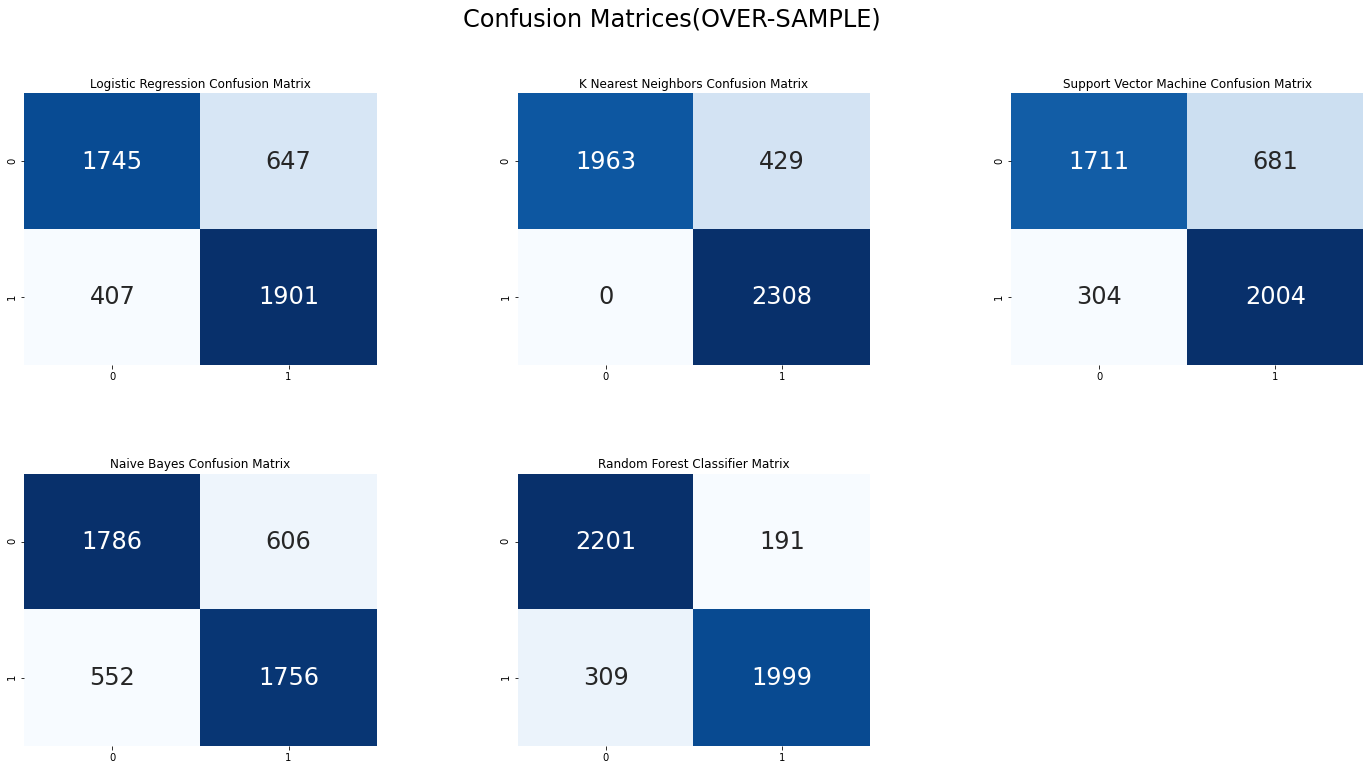

In [33]:
# Confusion Matrix for Oversample values
cm_lr2 = confusion_matrix(y_test_os,y_pred_log2)
cm_knn2 = confusion_matrix(y_test_os,y_pred_knn2)
cm_svm2 = confusion_matrix(y_test_os,y_pred_svm2)
cm_nb2 = confusion_matrix(y_test_os,y_pred_nb2)
cm_rfc2 = confusion_matrix(y_test_os,y_pred_rfc2)

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices(OVER-SAMPLE)",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Classifier Matrix")
sns.heatmap(cm_rfc2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

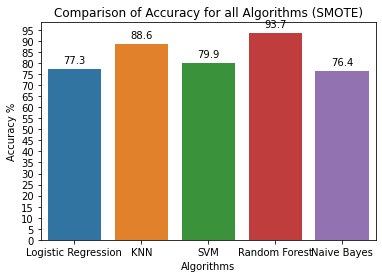

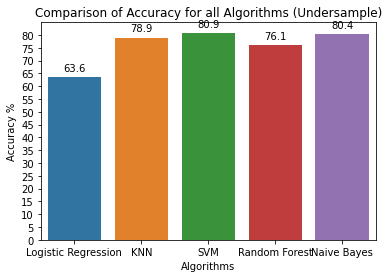

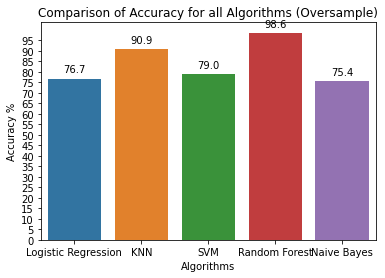

In [52]:
# Accurancy Score plot comparison for all Algorithms

# SMOTE
plt.figure()
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
splot = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Comparison of Accuracy for all Algorithms (SMOTE)", size=12)
plt.show()

# UNDERSAMPLE
plt.figure()
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
splot1 = sns.barplot(x=list(accuracies1.keys()), y=list(accuracies1.values()))
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Comparison of Accuracy for all Algorithms (Undersample)", size=12)
plt.show()

#OVERSAMPLE
plt.figure()
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
splot2 = sns.barplot(x=list(accuracies2.keys()), y=list(accuracies2.values()))
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Comparison of Accuracy for all Algorithms (Oversample)", size=12)
plt.show()





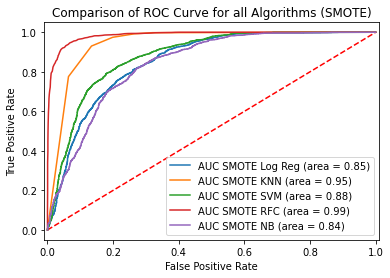

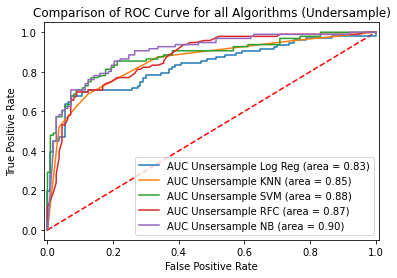

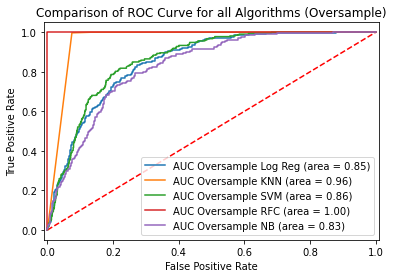

In [54]:
# Plotting ROC for all Algorithms

# SMOTE
plt.figure()
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_log, tpr_log, label='AUC SMOTE Log Reg (area = %0.2f)' % roc_auc_log)
plt.plot(fpr_knn, tpr_knn, label='AUC SMOTE KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, label='AUC SMOTE SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_rfc, tpr_rfc, label='AUC SMOTE RFC (area = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_nb, tpr_nb, label='AUC SMOTE NB (area = %0.2f)' % roc_auc_nb)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.xlim([-0.01,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Comparison of ROC Curve for all Algorithms (SMOTE)", size=12)
plt.show()


# UNDERSAMPLE 
plt.figure()
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_log1, tpr_log1, label='AUC Unsersample Log Reg (area = %0.2f)' % roc_auc_log1)
plt.plot(fpr_knn1, tpr_knn1, label='AUC Unsersample KNN (area = %0.2f)' % roc_auc_knn1)
plt.plot(fpr_svm1, tpr_svm1, label='AUC Unsersample SVM (area = %0.2f)' % roc_auc_svm1)
plt.plot(fpr_rfc1, tpr_rfc1, label='AUC Unsersample RFC (area = %0.2f)' % roc_auc_rfc1)
plt.plot(fpr_nb1, tpr_nb1, label='AUC Unsersample NB (area = %0.2f)' % roc_auc_nb1)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.xlim([-0.01,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Comparison of ROC Curve for all Algorithms (Undersample)", size=12)
plt.show()


# OVERSAMPLE
plt.figure()
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_log2, tpr_log2, label='AUC Oversample Log Reg (area = %0.2f)' % roc_auc_log2)
plt.plot(fpr_knn2, tpr_knn2, label='AUC Oversample KNN (area = %0.2f)' % roc_auc_knn2)
plt.plot(fpr_svm2, tpr_svm2, label='AUC Oversample SVM (area = %0.2f)' % roc_auc_svm2)
plt.plot(fpr_rfc2, tpr_rfc2, label='AUC Oversample RFC (area = %0.2f)' % roc_auc_rfc2)
plt.plot(fpr_nb2, tpr_nb2, label='AUC Oversample NB (area = %0.2f)' % roc_auc_nb2)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.xlim([-0.01,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Comparison of ROC Curve for all Algorithms (Oversample)", size=12)
plt.show()

In [36]:
# CROSS VALIDATION FOR ALL ALGORITHMS

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction


kfold = KFold(n_splits=4, random_state=45, shuffle=True) # k=5, split the data into 5 equal parts

# SMOTE
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression',
             'KNeighbors',
             'SVC',
             'Random Forest',
             'Naive Bayes']

models=[LogisticRegression(),
        KNeighborsClassifier(),
        SVC(),
        RandomForestClassifier(),
        GaussianNB()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       


# UNDERSAMPLE
xyz1=[]
accuracy1=[]
std1=[]
for i in models:
    model = i
    cv_result1 = cross_val_score(model,X_train_us,y_train_us, cv = kfold,scoring = "accuracy")
    cv_result1=cv_result1
    xyz1.append(cv_result1.mean())
    std1.append(cv_result1.std())
    accuracy1.append(cv_result1)
new_models_dataframe1=pd.DataFrame({'CV Mean':xyz1,'Std':std1},index=classifiers)       


# OVERSAMPLE
xyz2=[]
accuracy2=[]
std2=[]
for i in models:
    model = i
    cv_result2 = cross_val_score(model,X_train_os,y_train_os, cv = kfold,scoring = "accuracy")
    cv_result2=cv_result2
    xyz2.append(cv_result2.mean())
    std2.append(cv_result2.std())
    accuracy2.append(cv_result2)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz2,'Std':std2},index=classifiers)       

In [37]:
print("SMOTE Cross Validation for Algorithms")
new_models_dataframe

SMOTE Cross Validation for Algorithms


,CV Mean,Std
Logistic Regression,0.777021,0.012465
KNeighbors,0.873191,0.013102
SVC,0.810213,0.023081
Random Forest,0.929787,0.008174
Naive Bayes,0.765745,0.018336


In [38]:
print("Undersample Cross Validation for Algorithms")
new_models_dataframe1

Undersample Cross Validation for Algorithms


,CV Mean,Std
Logistic Regression,0.760885,0.043280
KNeighbors,0.751270,0.048578
SVC,0.799165,0.069577
Random Forest,0.770591,0.038894
Naive Bayes,0.779935,0.068541


In [39]:
print("Oversample Cross Validation for Algorithms")
new_models_dataframe2

Oversample Cross Validation for Algorithms


,CV Mean,Std
Logistic Regression,0.770426,0.007621
KNeighbors,0.890000,0.008412
SVC,0.788085,0.016415
Random Forest,0.972766,0.005449
Naive Bayes,0.749362,0.011816
